In this notebook we check the computation of the npm prediction.

In [1]:
from dpp import setup as SETUP
from dpp import pdf as PDF
from dpp import darkphoton
from dpp import npm

import numpy as np
import matplotlib.pyplot as plt
import random
import time

**setup and pdf instance**

In [2]:
setup = SETUP.Setup(400, 3)
NPM = npm.NPM(setup)
pdf = PDF.PDF()

**differential cross section**

In [3]:
M = 8.5
z = 0.5
kT = 0.2
dp1 = darkphoton.DarkPhoton(setup, M, z, kT)
dp2 = darkphoton.DarkPhoton(setup, M, z)

ensures that $k_T=0$

In [4]:
NPM.differential_cross_section(dp1)

AssertionError: At LO the dark photon has no transverse momentum.

In [5]:
NPM.differential_cross_section(dp2)

2.756748926599232e-06

**cross section**

In [7]:
NPM.integrated_cross_section(dp2)

2.3447761465695166e-06

**computation time of the differential cross section**

In [8]:
%timeit NPM.differential_cross_section(dp2)

10000 loops, best of 3: 64.9 µs per loop


**computation time of the cross section**

In [10]:
M_tab = []
z_tab = []
t_tab = []

n = 1000
for i in range(n):
    M = random.uniform(1, 10)
    z = random.uniform(0, 1)
    dp = darkphoton.DarkPhoton(setup, M, z, 0)
    zmin, zmax = dp.get_longitudinal_fraction_limit()
    if not zmin < z < zmax:
        continue
    else:
        t1 = time.time()
        NPM.integrated_cross_section(dp)
        t2 = time.time()
        
        M_tab.append(M)
        z_tab.append(z)
        t_tab.append(t2-t1)


<IPython.core.display.Javascript object>


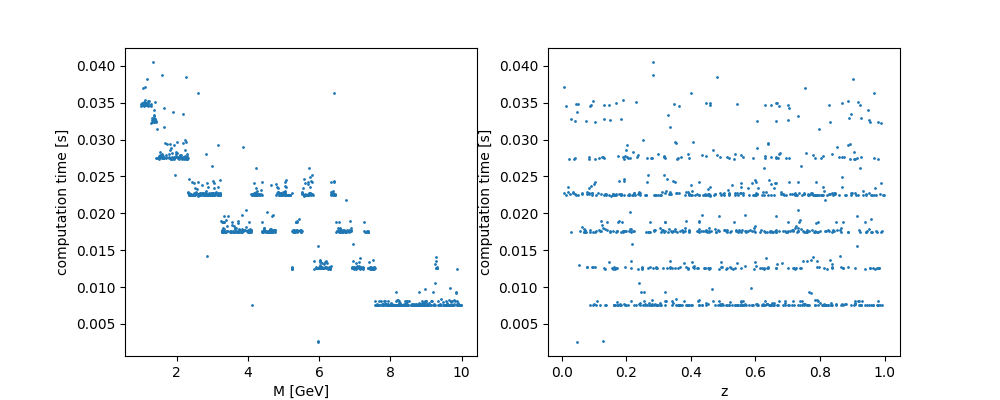

In [11]:
import matplotlib.pyplot as plt
%matplotlib notebook

fig, ax = plt.subplots(1, 2, figsize=(10,4))

ax[0].plot(M_tab, t_tab, marker='.', markersize=2, Linestyle='None')
ax[1].plot(z_tab, t_tab, marker='.', markersize=2, Linestyle='None')
ax[0].set(xlabel='M [GeV]', ylabel='computation time [s]')
ax[1].set(xlabel='z', ylabel='computation time [s]')


plt.show()
